<a href="https://colab.research.google.com/github/ardaedil/WaterPotabilityDetection/blob/main/WaterPotability2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="2"></a>
## Introduction

* Water quality is of vital importance to human health. Having accessible and safe drinking water is a fundamental requirement for maintaining a healthy life. Ensuring the availability of clean drinking water is a crucial step in preventing diseases and a critical component in improving the overall health of a community.

* Water quality not only impacts individual health but also plays a crucial role in societal and economic development. Issues such as environmental pollution and depletion of water sources pose a threat to the sustainability of sectors like agriculture, industry, and tourism. This, in turn, can have adverse effects on economic growth and reduce the overall quality of life.

* Preserving and improving water quality is a priority not only at the local level but also on a national and international scale. Sustainable management of water resources, along with measures like water treatment and distribution of purified water, plays a key role in maintaining and enhancing water quality. In this context, data analysis and scientific research related to water quality can provide policymakers with essential insights, helping them formulate effective strategies for water resource management and preservation of water quality.
    


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Machine Learning Packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, confusion_matrix

# For visualizing Decision Tree
from sklearn import tree

#Reading and Analyzing Data


In [2]:
# Creating DataFrame by using .csv file
df = pd.read_csv("/content/water_potability.csv")

FileNotFoundError: ignored

In [ ]:
# Let's take a quick look at the first 5 lines
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#Dependent Variable Analysis (Potability)

In [ ]:
potability = pd.DataFrame(df["Potability"].value_counts())

fig = px.pie(data_frame=potability, names=["Not Potable", "Potable"], values="Potability", hole=0.35, opacity=0.8, labels={"label": "Potability", "Potability": "Number of Samples"})
fig.update_layout(title=dict(text="Pie Chart of Potability Feature"))
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

#Correlation Between Features

In [ ]:
# Check the correlation table
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


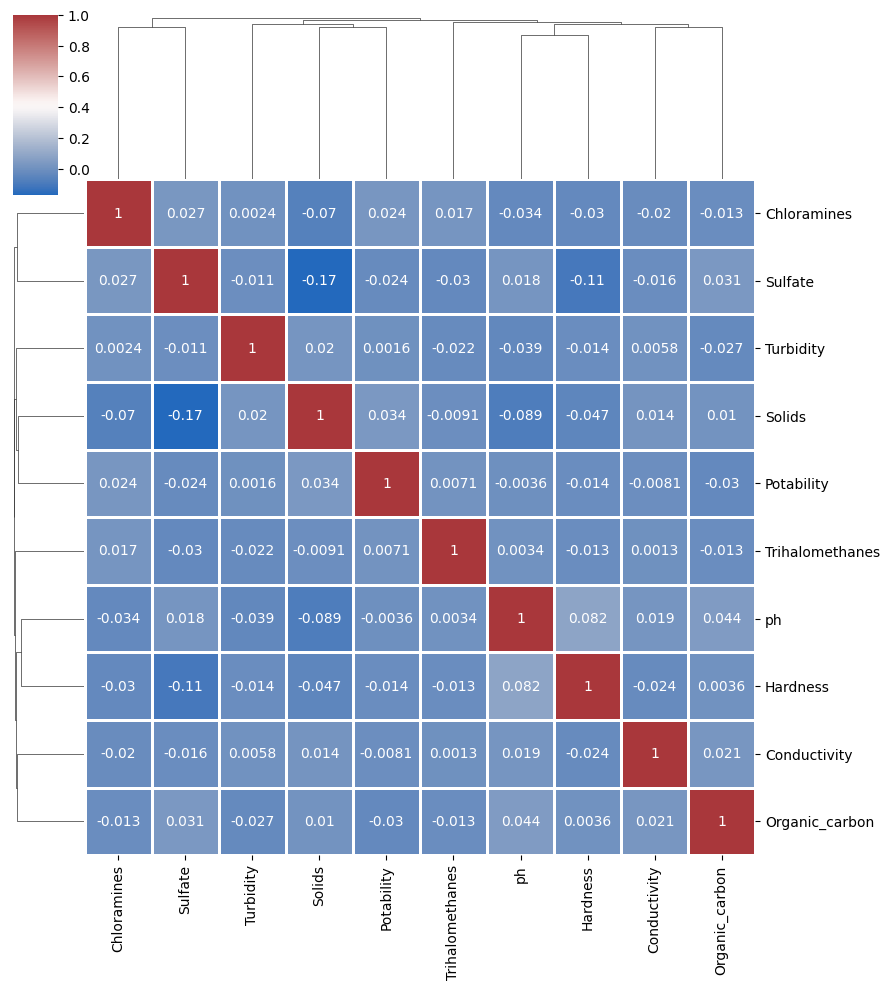

In [ ]:
# Check the correlation by using clustermap
sns.clustermap(df.corr(), cmap="vlag", dendrogram_ratio=(0.1, 0.2), annot=True, linewidths=.8, figsize=(9, 10))
plt.show()

#Distribution of Features#

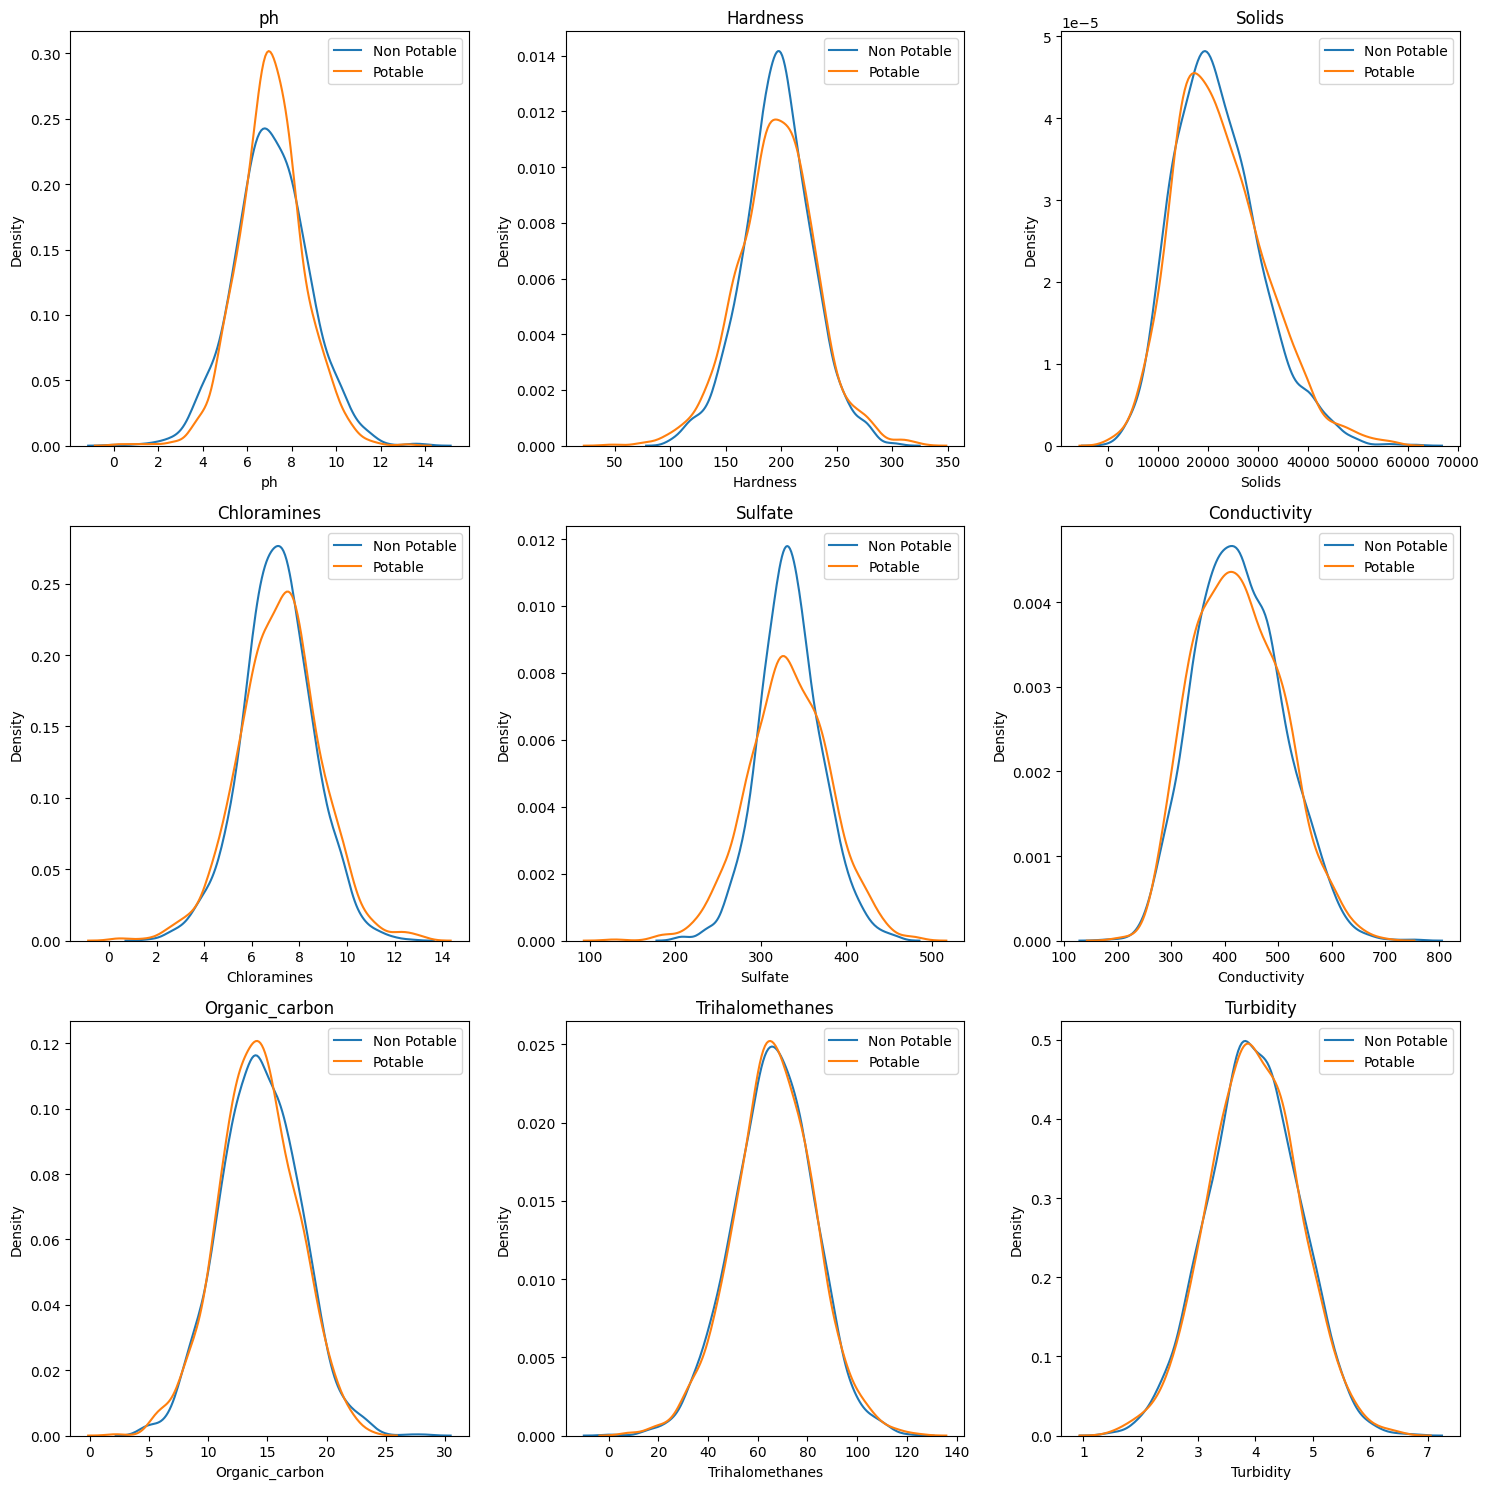

In [ ]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15,15))

for row, col in enumerate(df.columns[: 9]):
    # df.columns[: 9] because the 10th column is also "Potability"
    plt.subplot(3, 3, row + 1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col], label="Non Potable")
    sns.kdeplot(x=potable[col], label="Potable")
    plt.legend()

plt.tight_layout()

#Preprocessing: Missing Value#

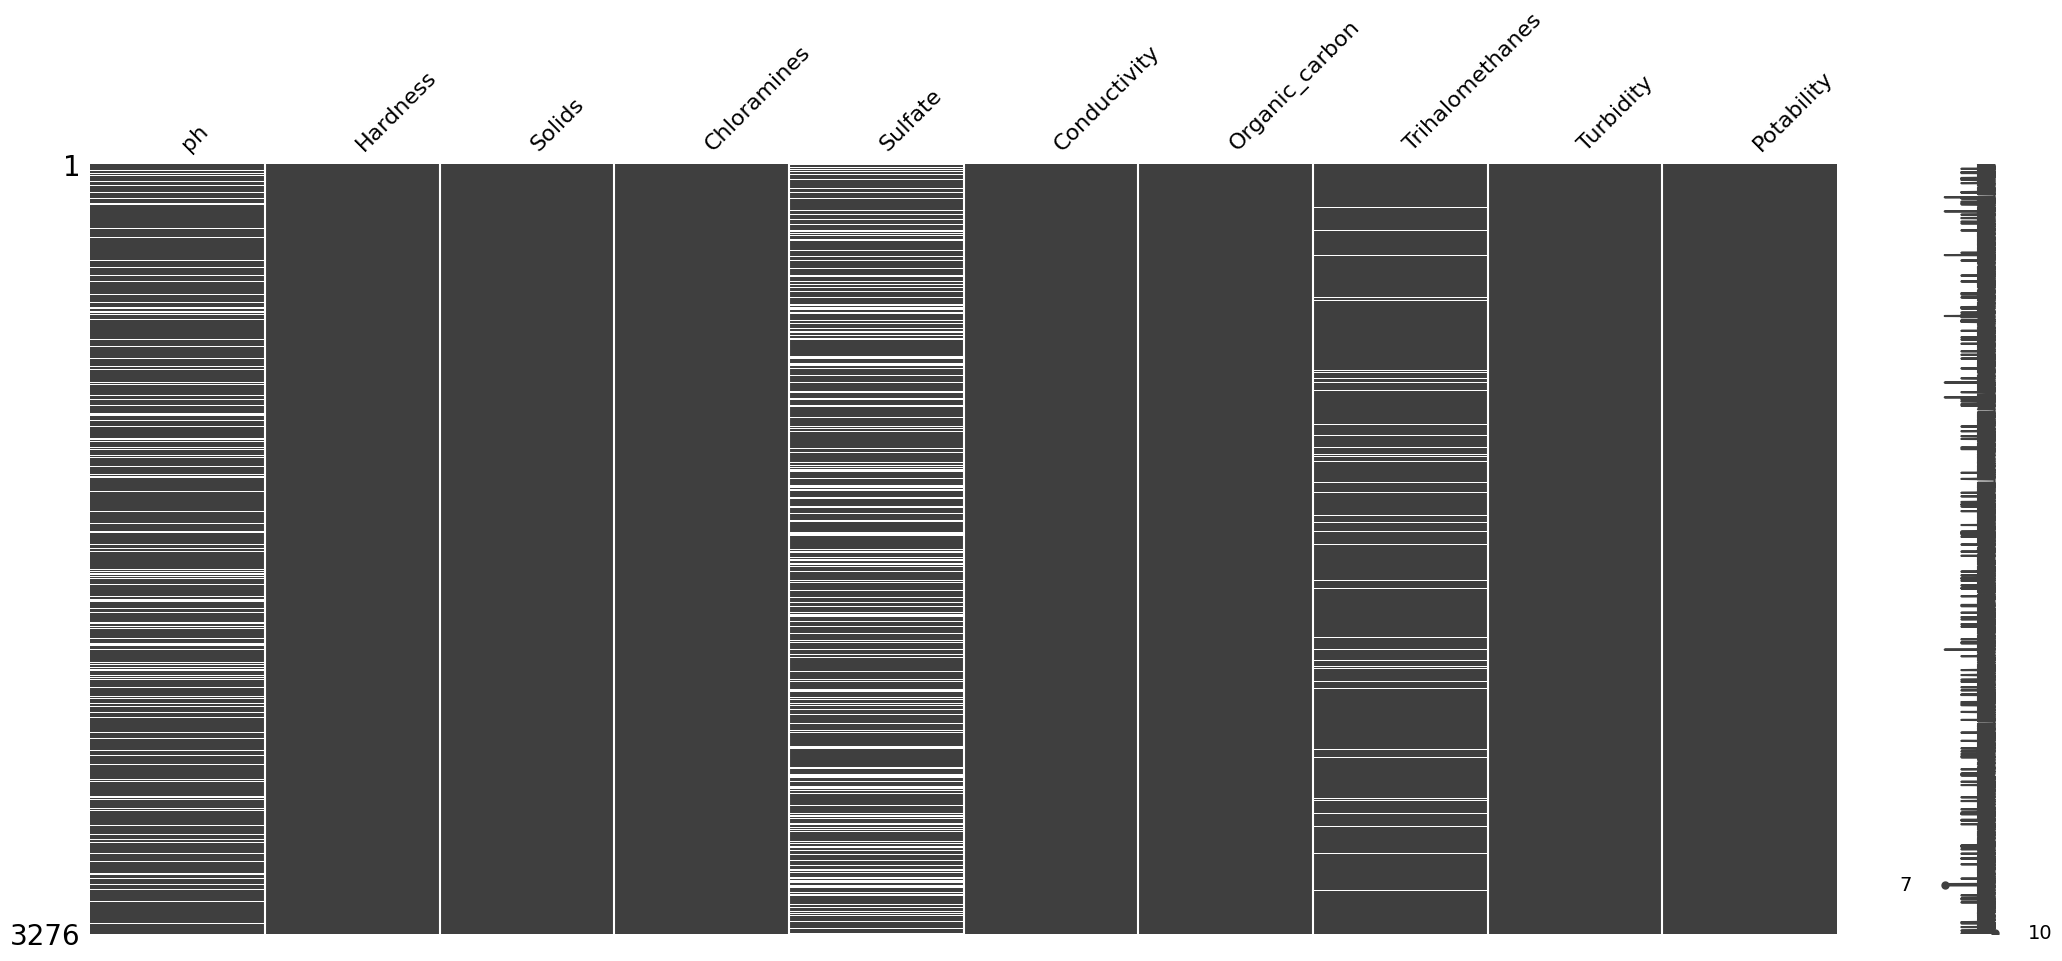

In [ ]:
# Check missing values by using msno.matrix()
msno.matrix(df)
plt.show()

In [ ]:
# Check missing value counts
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# Check median and mean values for missing value features
for col in ["ph", "Sulfate", "Trihalomethanes"]:
    print(f"{col} median value is: {df[col].median()}")
    print(f"{col} mean value is: {df[col].mean()}\n")

ph median value is: 7.036752103833548
ph mean value is: 7.080794504276835

Sulfate median value is: 333.073545745888
Sulfate mean value is: 333.7757766108135

Trihalomethanes median value is: 66.62248509808484
Trihalomethanes mean value is: 66.39629294676803



These 3 variables exhibit a Gaussian Distribution (Normal Distribution) so their mean or median values are usable for missing values.

In [ ]:
# Handling missing value with average of features
for col in ["ph", "Sulfate", "Trihalomethanes"]:
    df[col].fillna(value=df[col].mean(), inplace=True)

In [ ]:
# Check again the missing values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#Preprocessing: Train-Test Split#

In [ ]:
X = df.drop("Potability", axis=1).values
y = df["Potability"].values

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (2620, 9)
X_test (656, 9)
y_train (2620,)
y_test (656,)


**Precision Score** is an evaluation metric used in classification problems. Precision is defined as the ratio of true positive predictions (**TP - True Positive**) to the total positive predictions (**TP + FP - True Positive + False Positive**). In other words, precision aims to minimize false positive predictions (**FP - False Positive**).

**Precision Score** measures how well a classification model can limit false positive predictions and make accurate positive predictions. A high precision score indicates that fewer false positive predictions are made and that the majority of positive predictions are actually true positives.

**Precision Score** is an important evaluation metric, particularly in imbalanced classification problems and situations where the cost of false positive predictions is high and minimizing false positive predictions is crucial.

#Modelling: Decision Tree and Random Forest Classifiers#

In [ ]:
models = [("Decision Tree Classifier", DecisionTreeClassifier(max_depth=3)),
         ("Random Forest Classifier", RandomForestClassifier())]

# Used max_depth=3, because visualization is getting hard more than 3 in Decision Tree Classifier

In [ ]:
final_results = []
confusion_matrix_list = []

for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)

    final_results.append((name, score))
    confusion_matrix_list.append((name, cm))

In [ ]:
# Check precision_score list
final_results

[('Decision Tree Classifier', 0.6666666666666666),
 ('Random Forest Classifier', 0.6458333333333334)]

In [ ]:
# Check confusion_matrix_list list
confusion_matrix_list

[('Decision Tree Classifier',
  array([[388,   9],
         [241,  18]])),
 ('Random Forest Classifier',
  array([[346,  51],
         [166,  93]]))]

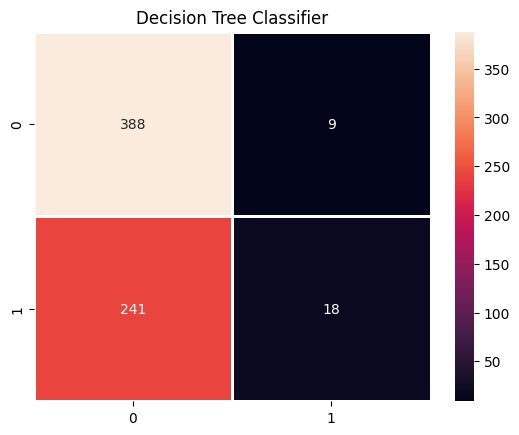

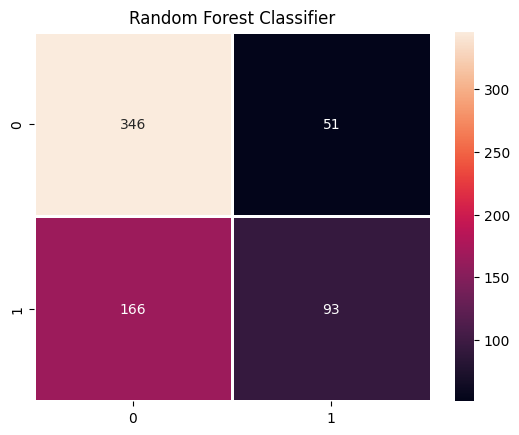

In [ ]:
# Visualization of Confusion Matrix for our prediction
for name, i in confusion_matrix_list:
    plt.figure()
    sns.heatmap(data=i, annot=True, linewidths=0.8, fmt=".0f")
    plt.title(name)
    plt.show()

final_results list and this chart demonstrate of Random Forest Classifier has better results than Decision Tree Classifier in our data.

#Visualize Decision Tree

In [ ]:
df_clf = models[0][1]
df_clf

DecisionTreeClassifier(max_depth=3)

In [ ]:
# tree.plot_tree() has "feature_names" parameter. This parameter uses a list
df.columns.tolist()[:-1] # Without dependent variable

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

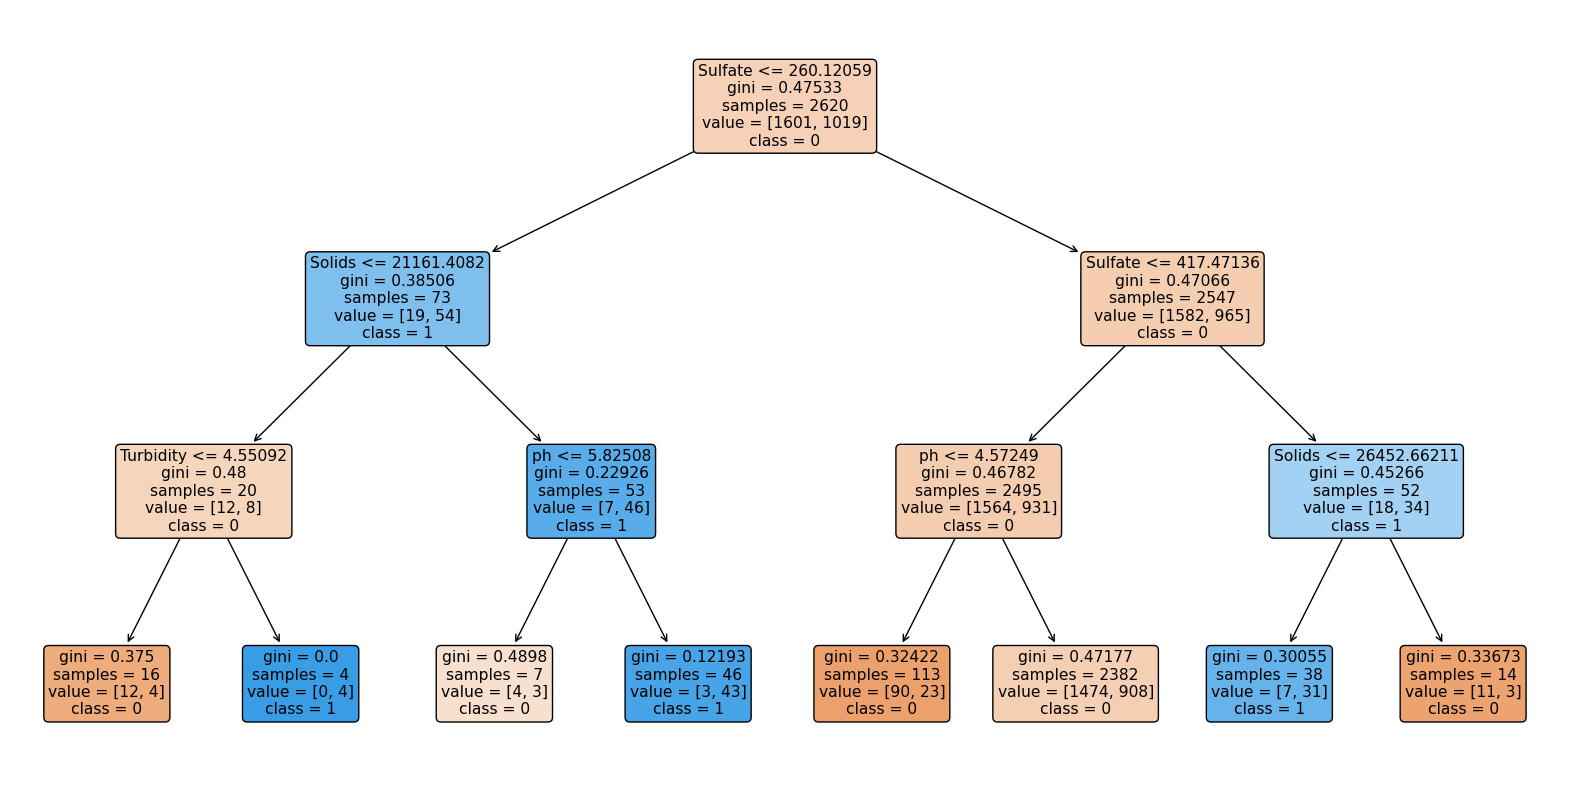

In [ ]:
plt.figure(figsize=(20,10))

tree.plot_tree(decision_tree=df_clf,
              feature_names=df.columns.tolist()[:-1],
              class_names=["0", "1"],
              filled=True,
              rounded=True,
              precision=5)

plt.show()

First node is "Sulfate" so that's mean the most important feature is "Sulfate".

#Random Forest Hyperparameter Tuning#

In [ ]:
model_params = {
    "Random Forest":
    {
        "model": RandomForestClassifier(),
        "params":
        {
            "n_estimators": [10, 50, 100],
            "max_features": ["sqrt", "log2"],
            "max_depth": list(range(1, 21, 3))
        }
    }
}
model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13, 16, 19]}}}

In [ ]:
# Cross Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

scores = []

for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params["model"], params["params"], cv=cv, n_iter=10)
    rs.fit(X, y)
    scores.append([model_name, dict(rs.best_params_), rs.best_score_])

scores

[['Random Forest',
  {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 13},
  0.667886101284677]]

#Re-Modelling#

In [ ]:
# Defining best parameters and modelling again
best_params = {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 16}

new_model = RandomForestClassifier(**best_params)

In [ ]:
new_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, max_features='log2')

In [ ]:
new_model_result = new_model.predict(X_test)
new_score = precision_score(y_test, new_model_result)

print("New Precision Score: ", new_score)

New Precision Score:  0.6557377049180327
